In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [11]:
df1 = pd.read_csv(r"C:\Users\User\Downloads\archive (1)\House Data_Pune.csv")

In [12]:
df1.head()

,area_type,location,Society,size,Baths,total_sqft,price,availability,Unnamed: 8,Unnamed: 9
0,Super Built-up Area,Bavdhan,Satyam Shrey,2 bhk,2.0,640,55.96,Under construction,NaN,NaN
1,Built-up Area,Sus,Kiran Sanskriti,2 bhk,2.0,690-720,45.00,Under construction,NaN,NaN
2,Built-up Area,Tathawade,Vivanta,2 bhk,2.0,688-693,60.00,Under construction,NaN,NaN
3,Super Built-up Area,Koregaon Park,Sunit Anant,3 bhk,3.0,1659,210.00,Ready to move,NaN,NaN
4,Built-up Area,Sinhgad Road,Nanded city,3 bhk,3.0,1450,78.00,Ready to move,NaN,NaN


In [13]:
df1.shape

(1629, 10)

In [14]:
df1.columns

Index(['area_type', 'location', 'Society', 'size', 'Baths', 'total_sqft',
       'price', 'availability', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [15]:
df1['area_type'].unique()

array(['Super Built-up Area', 'Built-up Area', 'Plot Area', nan,
       'Carpet Area', 'Built-up area', 'Villa', 'Built-up  Area',
       'Super built-up  Area', 'Plot  Area'], dtype=object)

In [16]:
df1['area_type'].value_counts()

Super built-up  Area    193
Built-up Area           175
Super Built-up Area     152
Built-up  Area           56
Plot  Area               42
Plot Area                21
Built-up area             4
Carpet Area               3
Villa                     1
Name: area_type, dtype: int64

In [17]:
df2= df1.drop(["area_type","availability","Unnamed: 8","Unnamed: 9"],axis="columns")

In [18]:
df2.head()

,location,Society,size,Baths,total_sqft,price
0,Bavdhan,Satyam Shrey,2 bhk,2.0,640,55.96
1,Sus,Kiran Sanskriti,2 bhk,2.0,690-720,45.00
2,Tathawade,Vivanta,2 bhk,2.0,688-693,60.00
3,Koregaon Park,Sunit Anant,3 bhk,3.0,1659,210.00
4,Sinhgad Road,Nanded city,3 bhk,3.0,1450,78.00


In [19]:
df2.isnull().sum()

location         0
Society       1332
size             3
Baths           13
total_sqft       1
price            0
dtype: int64

In [20]:
df2.shape

(1629, 6)

In [21]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
Society       0
size          0
Baths         0
total_sqft    0
price         0
dtype: int64

In [22]:
df3.shape

(296, 6)

In [23]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\User\AppData\Local\Temp\ipykernel_7416\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  3,  1,  4, 10,  6,  5,  8], dtype=int64)

In [24]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,Society,size,Baths,total_sqft,price,bhk
1,Sus,Kiran Sanskriti,2 bhk,2.0,690-720,45.00,2
2,Tathawade,Vivanta,2 bhk,2.0,688-693,60.00,2
6,Bibwewadi,Sukhsagar Nagar,2 bhk,2.0,850-950,50.00,2
8,Dhankawadi,Ganga Altus,3 bhk,3.0,850-950,87.50,3
9,Dhankawadi,Ganga Altus,2 bhk,2.0,650-750,67.50,2
10,Hinjewadi,Rohan Ipsita,2 bhk,2.0,645-716,59.43,2
11,Hinjewadi,Rohan Ipsita,1 bhk,1.0,346-384,37.00,1
12,Moshi,Kasturi,2 bhk,2.0,627-628,72.00,2
13,Baner,Rachana,2 bhk,2.0,573-606,69.00,2
28,Bibwewadi,Pride Purple,2 bhk,2.0,865-1168,105.50,2


In [26]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [27]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,Society,size,Baths,total_sqft,price,bhk
0,Bavdhan,Satyam Shrey,2 bhk,2.0,640.0,55.96,2
1,Sus,Kiran Sanskriti,2 bhk,2.0,705.0,45.00,2


In [28]:
df4.loc[30]

location            Katraj
Society       Shri Sadguru
size                 2 bhk
Baths                  2.0
total_sqft           970.0
price                 60.0
bhk                      2
Name: 30, dtype: object

In [29]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,Society,size,Baths,total_sqft,price,bhk,price_per_sqft
0,Bavdhan,Satyam Shrey,2 bhk,2.0,640.0,55.96,2,8743.750000
1,Sus,Kiran Sanskriti,2 bhk,2.0,705.0,45.00,2,6382.978723
2,Tathawade,Vivanta,2 bhk,2.0,690.5,60.00,2,8689.355539
3,Koregaon Park,Sunit Anant,3 bhk,3.0,1659.0,210.00,3,12658.227848
4,Sinhgad Road,Nanded city,3 bhk,3.0,1450.0,78.00,3,5379.310345


In [30]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count      296.000000
mean      8627.098905
std       3901.393590
min       2631.578947
25%       6367.979155
50%       8012.345679
75%       9934.782609
max      45849.802372
Name: price_per_sqft, dtype: float64

In [31]:
df5.to_csv("bhp.csv",index=False)

In [32]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Bibwewadi            90
Dhankawadi           70
Katraj               39
Hadapsar             21
Koregaon Park        17
Karve Nagar          16
Sinhgad Road         16
Padmavati             3
Bavdhan               3
Sus                   2
Hinjewadi             2
Meera nagar           2
Amanora town          2
Shivaji Nagar         2
Ambegaon              2
Baner                 1
Moshi                 1
Kanchan Nagari        1
Samarth Nagar         1
Mohan Nagar           1
Tathawade             1
Kondhwa               1
Wakad                 1
Vighnaharta Nagar     1
Name: location, dtype: int64

In [33]:
location_stats.values.sum()

296

In [34]:
len(location_stats[location_stats>10])

7

In [35]:
len(location_stats)

24

In [36]:
len(location_stats[location_stats<=10])

17

In [37]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Padmavati            3
Bavdhan              3
Sus                  2
Hinjewadi            2
Meera nagar          2
Amanora town         2
Shivaji Nagar        2
Ambegaon             2
Baner                1
Moshi                1
Kanchan Nagari       1
Samarth Nagar        1
Mohan Nagar          1
Tathawade            1
Kondhwa              1
Wakad                1
Vighnaharta Nagar    1
Name: location, dtype: int64

In [38]:
len(df5.location.unique())


24

In [39]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

8

In [40]:
df5.head(10)

,location,Society,size,Baths,total_sqft,price,bhk,price_per_sqft
0,other,Satyam Shrey,2 bhk,2.0,640.0,55.96,2,8743.750000
1,other,Kiran Sanskriti,2 bhk,2.0,705.0,45.00,2,6382.978723
2,other,Vivanta,2 bhk,2.0,690.5,60.00,2,8689.355539
3,Koregaon Park,Sunit Anant,3 bhk,3.0,1659.0,210.00,3,12658.227848
4,Sinhgad Road,Nanded city,3 bhk,3.0,1450.0,78.00,3,5379.310345
5,Koregaon Park,New Akshaya,2 bhk,2.0,1300.0,100.00,2,7692.307692
6,Bibwewadi,Sukhsagar Nagar,2 bhk,2.0,900.0,50.00,2,5555.555556
7,Koregaon Park,Tulip,2 bhk,2.0,1080.0,95.00,2,8796.296296
8,Dhankawadi,Ganga Altus,3 bhk,3.0,900.0,87.50,3,9722.222222
9,Dhankawadi,Ganga Altus,2 bhk,2.0,700.0,67.50,2,9642.857143


In [41]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,Society,size,Baths,total_sqft,price,bhk,price_per_sqft
13,other,Rachana,2 bhk,2.0,589.5,69.00,2,11704.834606
124,Sinhgad Road,Monte Rosa,2 bhk,2.0,253.0,116.00,2,45849.802372
224,Katraj,Shree Ganesh Vihar,1 rk,1.0,265.0,12.00,1,4528.301887
247,Hadapsar,Shapoorji annexe,3 bhk,3.0,820.0,70.02,3,8539.024390
262,Karve Nagar,Basera hsg soc,4 bhk,3.0,1000.0,130.00,4,13000.000000


In [42]:
df5.shape

(296, 8)

In [43]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(288, 8)

In [44]:
df6.price_per_sqft.describe()

count      288.000000
mean      8516.922626
std       3245.034199
min       2631.578947
25%       6379.590730
50%       8012.345679
75%       9894.927536
max      30000.000000
Name: price_per_sqft, dtype: float64

In [45]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(211, 8)

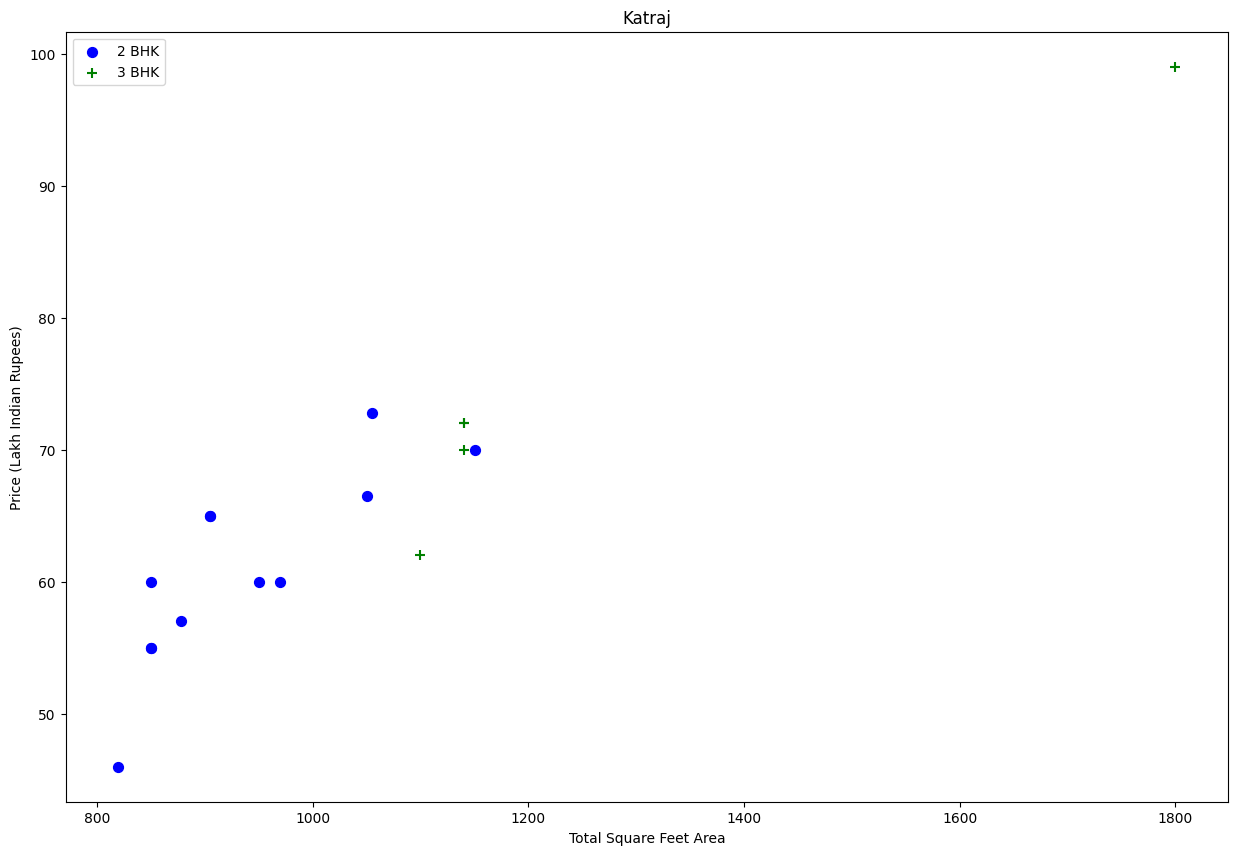

In [46]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Katraj")

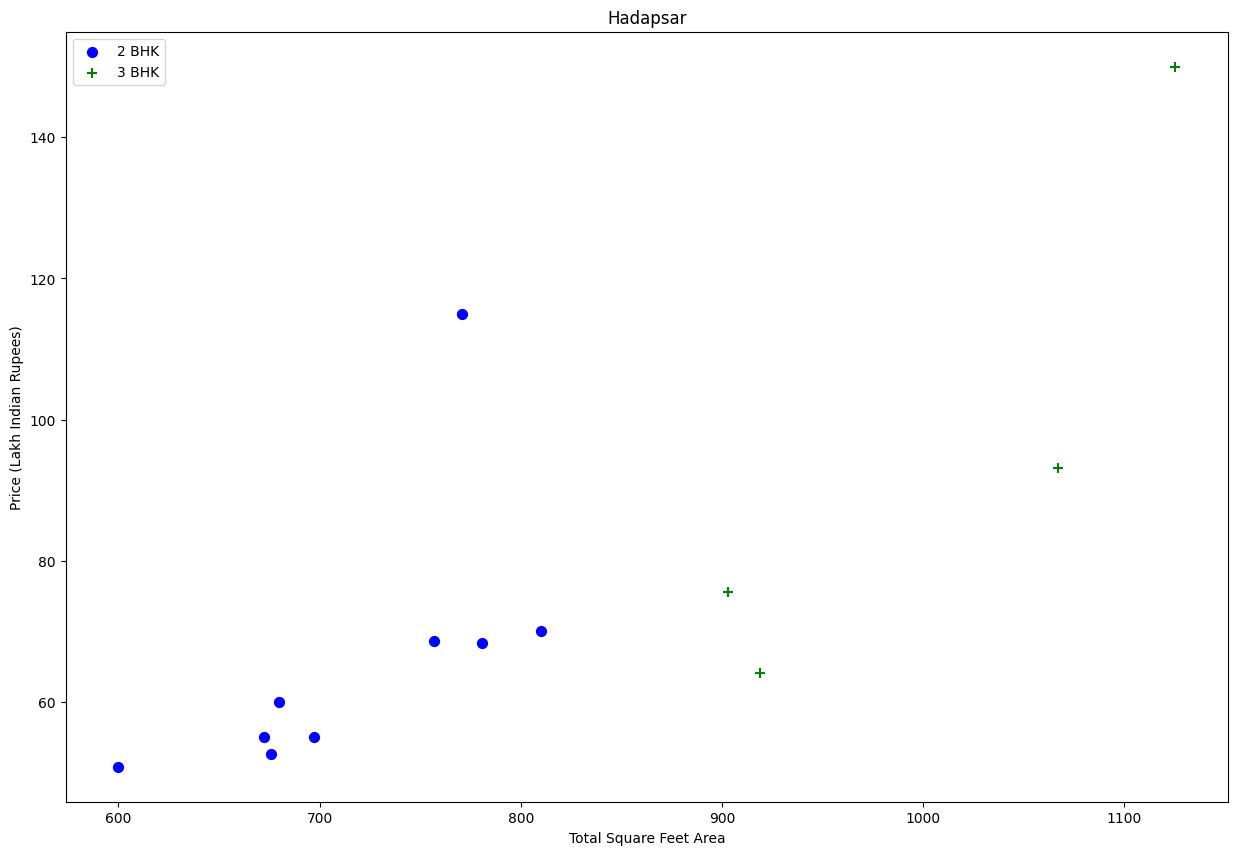

In [47]:
plot_scatter_chart(df7,"Hadapsar")

In [48]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(179, 8)

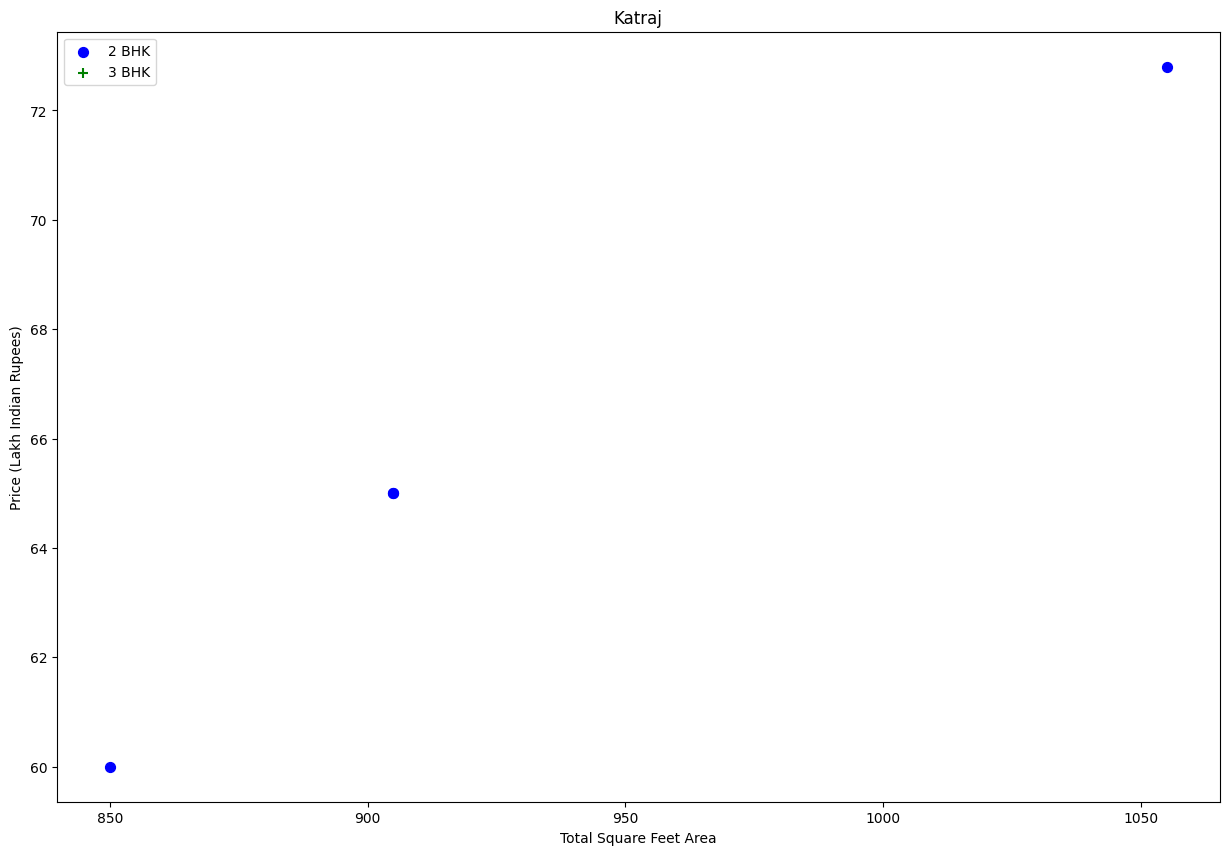

In [49]:
plot_scatter_chart(df8,"Katraj")

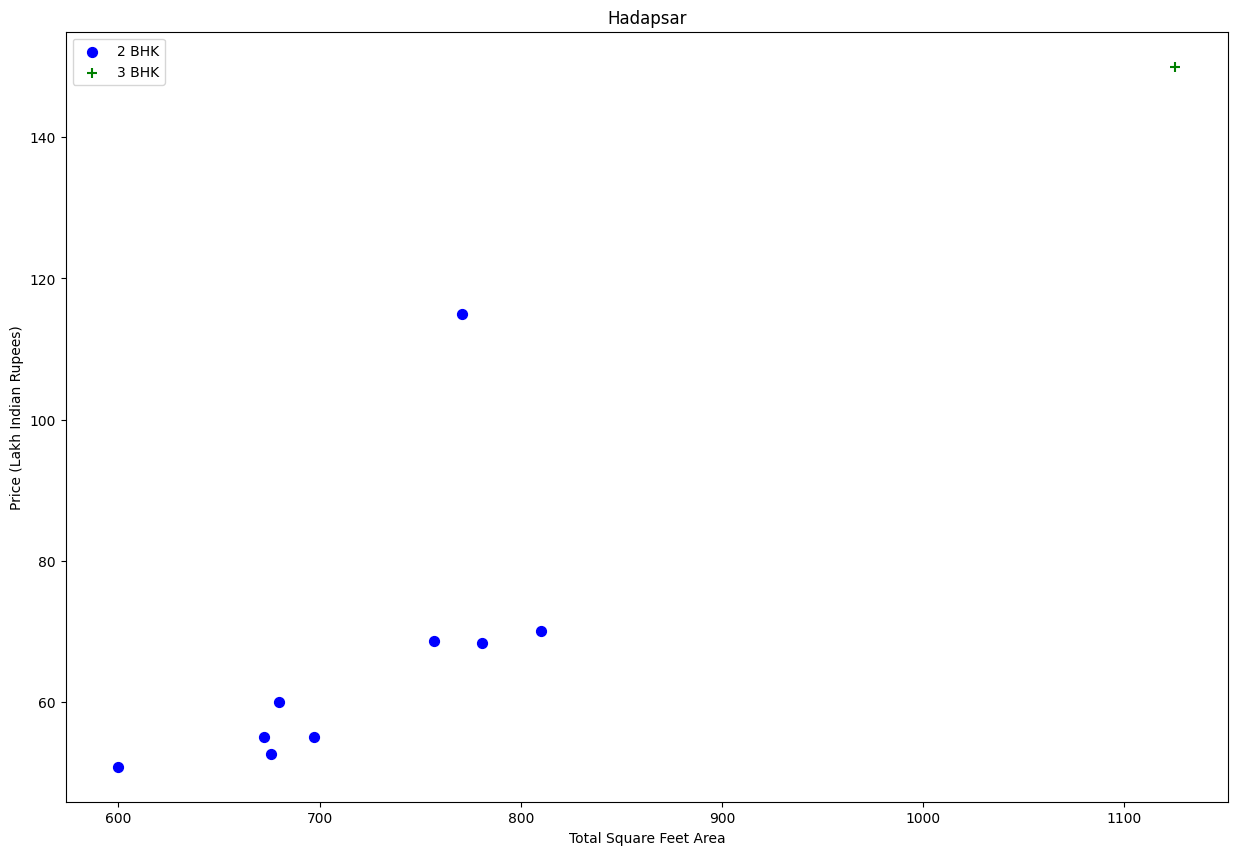

In [50]:
plot_scatter_chart(df8,"Hadapsar")

Text(0, 0.5, 'Count')

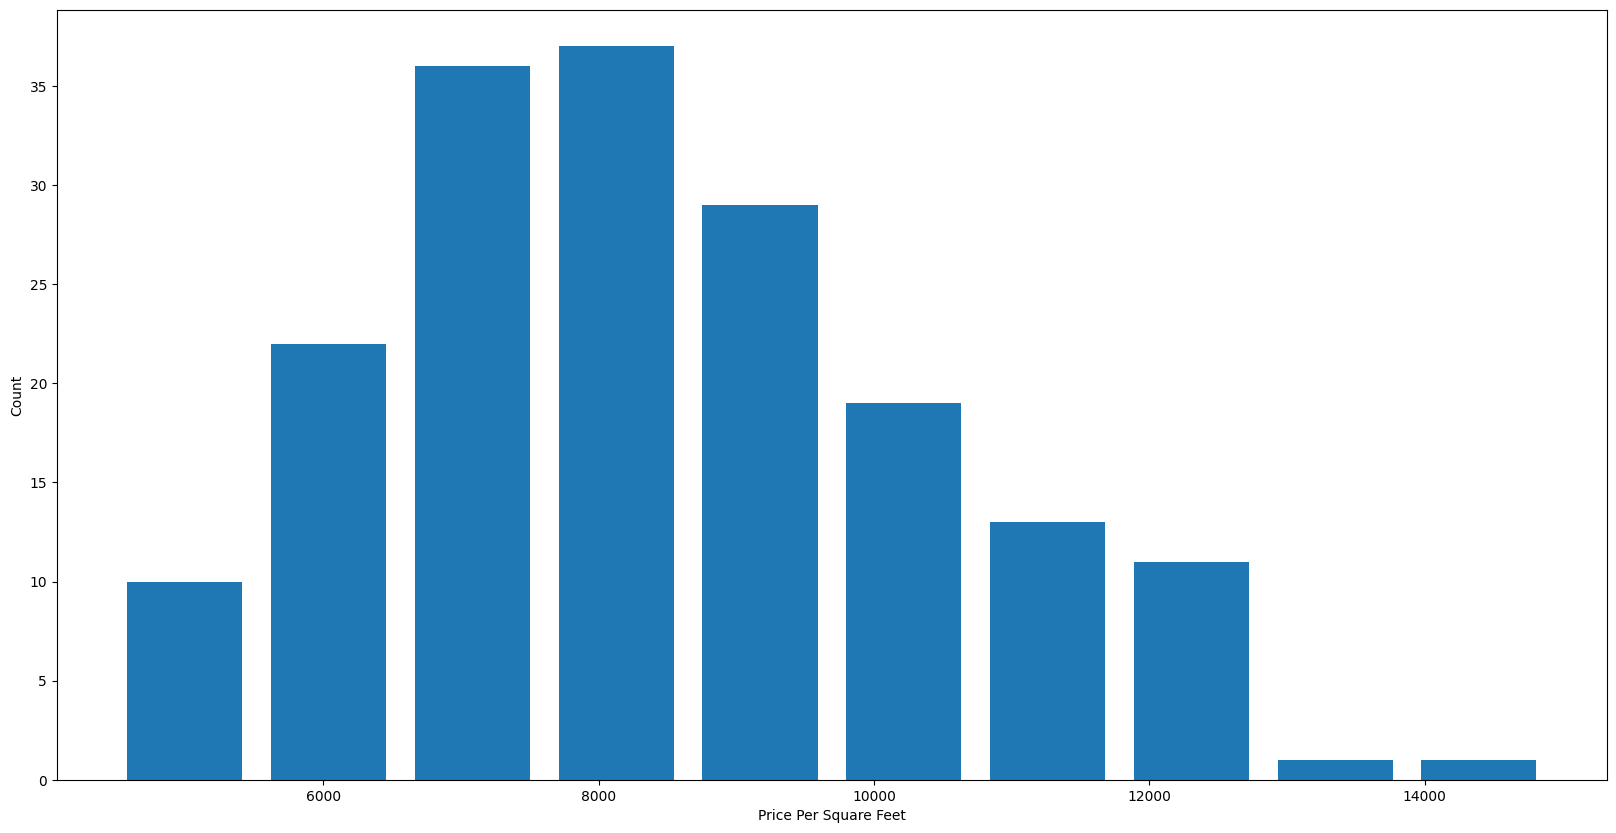

In [51]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [52]:
df8.Baths.unique()

array([2., 1., 3., 4., 5., 7.])

Text(0, 0.5, 'Count')

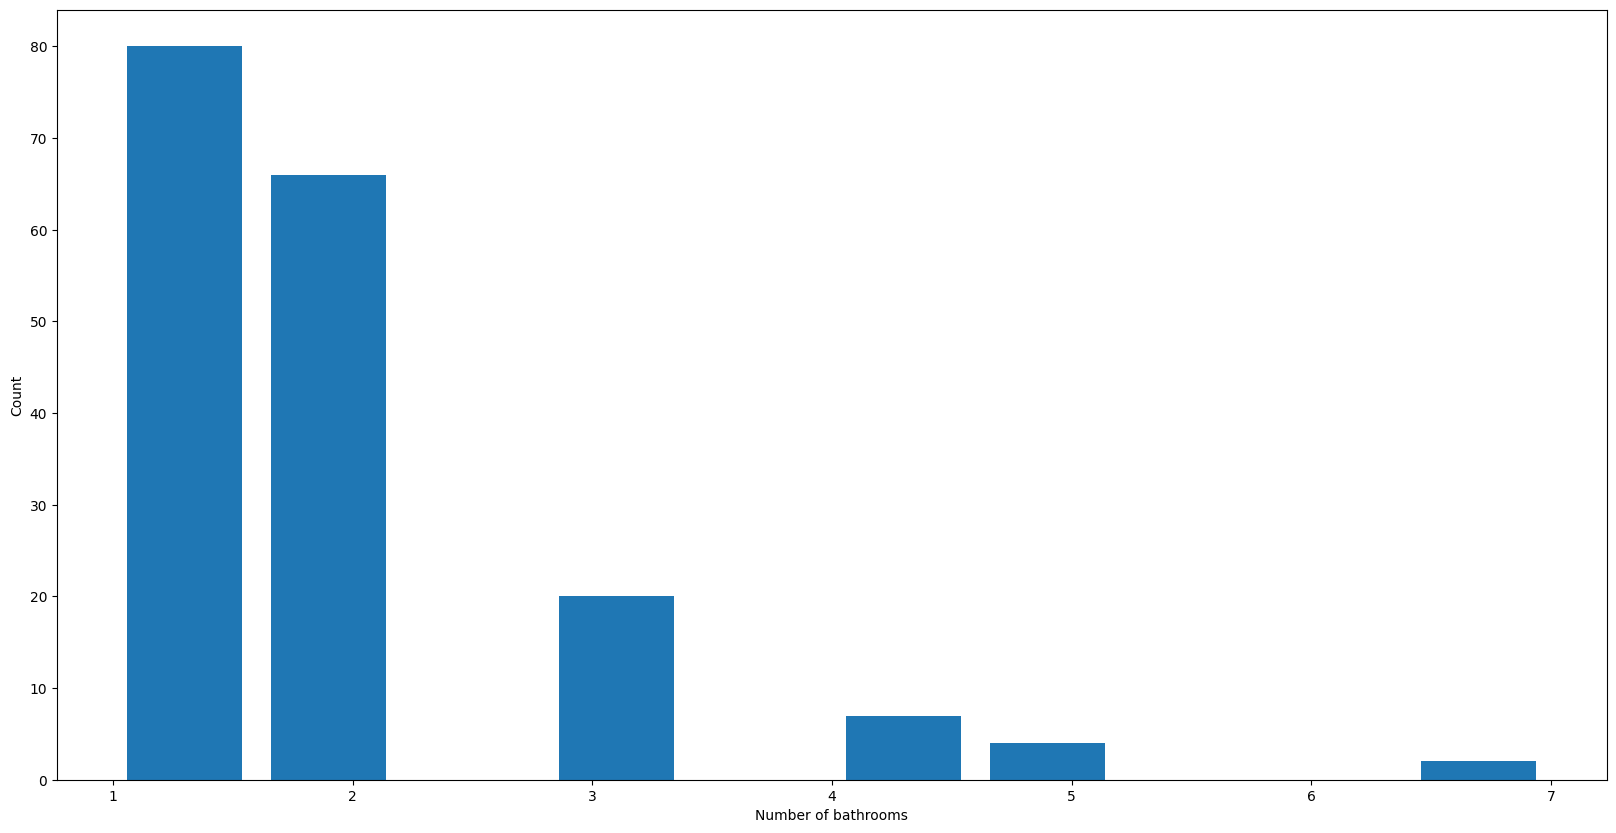

In [53]:
plt.hist(df8.Baths,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [54]:
df9 = df8[df8.Baths<df8.bhk+2]
df9.shape

(179, 8)

In [55]:
df9.head(2)

,location,Society,size,Baths,total_sqft,price,bhk,price_per_sqft
0,Bibwewadi,Laketown,2 bhk,2.0,1050.0,102.0,2,9714.285714
1,Bibwewadi,Pride Purple,2 bhk,2.0,1016.5,105.5,2,10378.750615


In [56]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,Society,Baths,total_sqft,price,bhk
0,Bibwewadi,Laketown,2.0,1050.0,102.0,2
1,Bibwewadi,Pride Purple,2.0,1016.5,105.5,2
2,Bibwewadi,Mahesh Society,1.0,350.0,25.0,1


In [57]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Bibwewadi,Dhankawadi,Hadapsar,Karve Nagar,Katraj,Koregaon Park,Sinhgad Road,other
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0


In [58]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,Society,Baths,total_sqft,price,bhk,Bibwewadi,Dhankawadi,Hadapsar,Karve Nagar,Katraj,Koregaon Park,Sinhgad Road
0,Bibwewadi,Laketown,2.0,1050.0,102.0,2,1,0,0,0,0,0,0
1,Bibwewadi,Pride Purple,2.0,1016.5,105.5,2,1,0,0,0,0,0,0
2,Bibwewadi,Mahesh Society,1.0,350.0,25.0,1,1,0,0,0,0,0,0
3,Bibwewadi,Mahesh Society,1.0,550.0,38.0,1,1,0,0,0,0,0,0
5,Bibwewadi,Chintamani,1.0,460.0,35.0,1,1,0,0,0,0,0,0


In [59]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,Society,Baths,total_sqft,price,bhk,Bibwewadi,Dhankawadi,Hadapsar,Karve Nagar,Katraj,Koregaon Park,Sinhgad Road
0,Laketown,2.0,1050.0,102.0,2,1,0,0,0,0,0,0
1,Pride Purple,2.0,1016.5,105.5,2,1,0,0,0,0,0,0


In [60]:
df12.shape

(179, 12)

In [61]:
X = df12.drop(['price','Society'],axis='columns')
X.head()

,Baths,total_sqft,bhk,Bibwewadi,Dhankawadi,Hadapsar,Karve Nagar,Katraj,Koregaon Park,Sinhgad Road
0,2.0,1050.0,2,1,0,0,0,0,0,0
1,2.0,1016.5,2,1,0,0,0,0,0,0
2,1.0,350.0,1,1,0,0,0,0,0,0
3,1.0,550.0,1,1,0,0,0,0,0,0
5,1.0,460.0,1,1,0,0,0,0,0,0


In [62]:
X.shape

(179, 10)

In [63]:
y = df12.price
y.head(3)

0    102.0
1    105.5
2     25.0
Name: price, dtype: float64

In [64]:
len(y)

179

In [65]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [66]:
linear_model= LinearRegression()

In [68]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [69]:
training_data_prediction = linear_model.predict(X_train)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [86]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7915632206105848

In [87]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.88109087, 0.81019575, 0.90881106, 0.90126379, 0.81103231])

In [88]:
X.columns

Index(['Baths', 'total_sqft', 'bhk', 'Bibwewadi', 'Dhankawadi', 'Hadapsar',
       'Karve Nagar', 'Katraj', 'Koregaon Park', 'Sinhgad Road'],
      dtype='object')

In [89]:
np.where(X.columns=="Bibwewadi")[0][0]

3

In [90]:
def predict_price(location,total_sqft,Baths,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = Baths
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [91]:
predict_price('Bibwewadi',1050, 2, 2)

C:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45072.63551968104